<a href="https://colab.research.google.com/github/deepandas11/Deep-Learning-with-TensorFlow-Keras-PyTorch/blob/master/Deep_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Deep Network Models


* VGG16
* VGG19
* ResNet50
* Inception v3
* Xception

In [0]:
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import os
from keras import backend as K

In [30]:
vgg16 = VGG16(include_top = True, weights = 'imagenet')
vgg19 = VGG19(include_top = True, weights = 'imagenet')
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
from google.colab import files
uploaded = files.upload()

Saving apricot_565.jpeg to apricot_565.jpeg
Saving apricot_696.jpeg to apricot_696.jpeg
Saving apricot_787.jpeg to apricot_787.jpeg
Saving strawberry_1157.jpeg to strawberry_1157.jpeg
Saving strawberry_1174.jpeg to strawberry_1174.jpeg
Saving strawberry_1189.jpeg to strawberry_1189.jpeg


In [31]:
from keras.preprocessing import image
import numpy as np


img_path = os.path.join('strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07745940', 'strawberry', 0.9857027), ('n07836838', 'chocolate_sauce', 0.0051280526), ('n04332243', 'strainer', 0.003665665), ('n07614500', 'ice_cream', 0.0021994396), ('n04476259', 'tray', 0.0011691322)]]


In [32]:
img_path = os.path.join('apricot_565.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07718472', 'cucumber', 0.37633196), ('n07716358', 'zucchini', 0.25885594), ('n07711569', 'mashed_potato', 0.04936721), ('n07716906', 'spaghetti_squash', 0.03363548), ('n12144580', 'corn', 0.03145728)]]


#### Visualizing Convolutional Filters of a CNN

In [0]:
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

vgg16 = VGG16(weights='imagenet',include_top=False)

In [0]:
from collections import OrderedDict
layer_dict = OrderedDict()

for layer in vgg16.layers[1:]:
  layer_dict[layer.name] = layer

##### Test Image

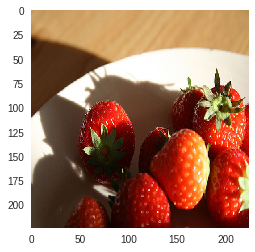

In [46]:
img_path = os.path.join('strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
input_img_data = image.img_to_array(img)

plt.imshow(img)
plt.grid(None)

#plt.imshow(input_img_data)
#plt.grid(None)

In [0]:
def get_activations(model, layer, input_img_data):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((input_img_data, False))
    return activations

In [48]:
layer_name = 'block1_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)

InvalidArgumentError: ignored